# Feature Engineering - Filling or Dropping Data based on Rows

Pentru această parte o să avem să ne ocupăm de partea în care fie ștergem anumite date dintr-un set de date (date cu valori nule), fie înlocuim anumite rânduri cu valori nule cu anumite valori. În cadrul lecției precedente am calculat procentajul de date lipsă pentru fiecare feature din setul de date. În această parte o să ne focusăm pe fatures care nu au un procentaj extrem de mare de date lipsă.

La anumite features care au doar câteva rânduri lipsă, aici trebuie să luăm decizia de a șterge acele rânduri sau de a înlocui valorile nule cu o asumpție a acelui rând pentru feature-ul respectiv în funcție de cunoștințele din domeniu sau pe baza unor funcții matematice

Pentru a putea experimenta partea de filling sau dropping pentru features care au puține date lispă o să trebuiască să ajungem din nou la același rezultat ca și în lecția precedentă.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data into a DataFrame
df = pd.read_csv('../data/DATA/Ames_Housing_Data_outliers_removed.csv')

In [3]:
df.head()

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
def extract_missing_info(df):
    percentage_missing = (100 * df.isnull().sum() / len(df)).sort_values()
    percentage_missing = percentage_missing[percentage_missing > 0]

    return percentage_missing

In [10]:
percentage_missing = extract_missing_info(df)

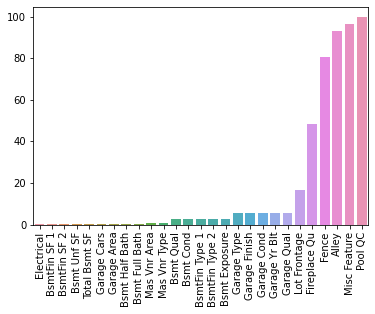

In [11]:
sns.barplot(x=percentage_missing.index, y=percentage_missing)
plt.xticks(rotation=90);

(0.0, 1.0)

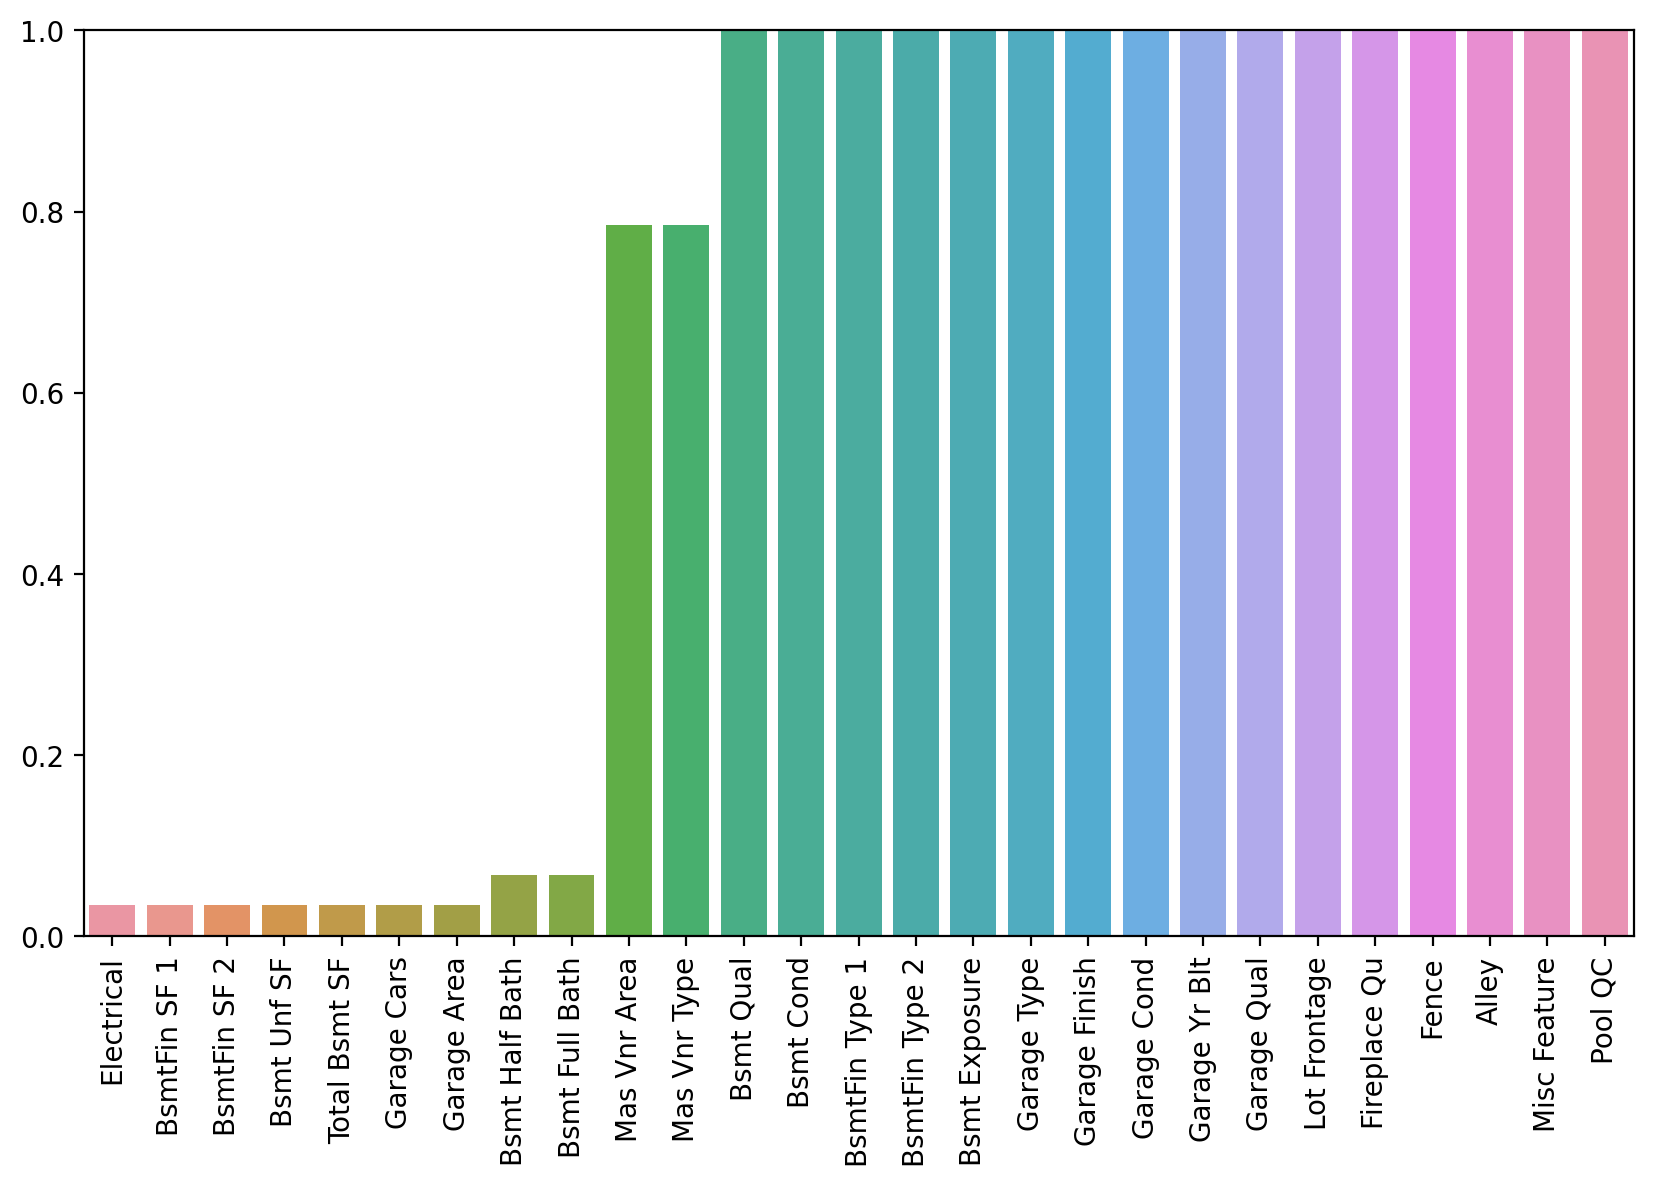

In [12]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(x=percentage_missing.index, y=percentage_missing)
plt.xticks(rotation=90)
plt.ylim(0, 1)

Acum avem un plot în care ne sunt afișate mai vizibil features care au un procentaj sub 1% de valori care lipsesc. Putem vedea că sunt anumite features care au aceeași valoare de procent. În continuare o să filtrăm setul de date să ne afișeze doar elementele unde sunt valori lipsă din coloana 'Electrical'

In [13]:
df[df['Electrical'].isnull()]

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,1577,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Se poate observa că acea coloană are doar un singur rând unde sunt valori lispă. Ce se poate face aici este să se verifice dacă cumva și pentru o altă coloană care are valori lipsă să se retuneze același index (poate o casă are valori lipsă la mai multe dintre coloanele care fac parte din acel sub 1%). Să verificăm pentru feature-ul 'Garage Cars' deoarece restul de features au o denumire asemănătoare. (toate au Bsmt în denumire)

In [14]:
df[df['Garage Cars'].isnull()]

,Unnamed: 0,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,2236,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


Valoare pentru index este diferită, ceea ce înseamnă că sunt două rânduri diferite. Putem totuși să ștergem aceste două rânduri deoarece nu reprezintă un număr așa de mare de elemente care o să fie șterse (două rânduri din aproape 3000). Să ștergem aceste date

In [15]:
df = df.dropna(subset=['Electrical', 'Garage Cars'], axis=0)

In [17]:
new_percentage_missing = extract_missing_info(df)

(0.0, 1.0)

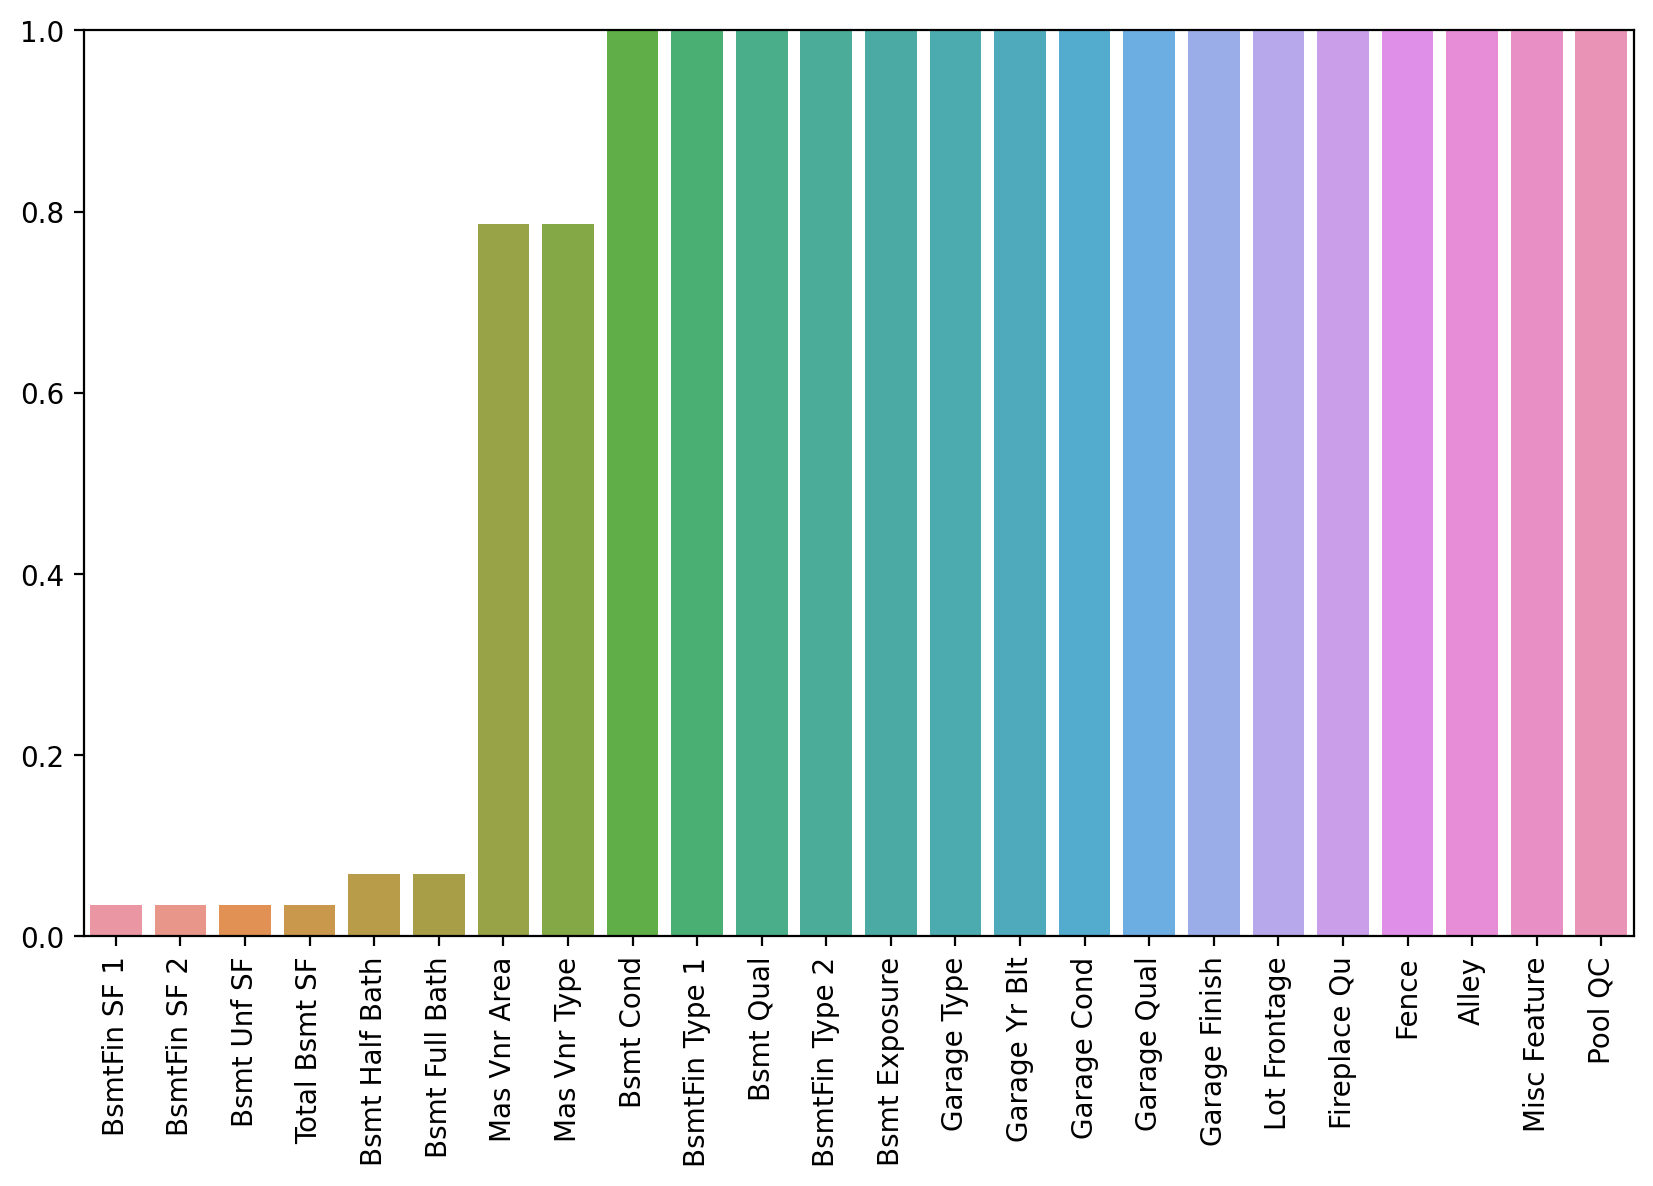

In [18]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(x=new_percentage_missing.index, y=new_percentage_missing)
plt.xticks(rotation=90)
plt.ylim(0, 1)

În acest moment ne-au mai rămas doar acele features care au denumirea de Bsmt în ele, denumirea care ar putea fi prescurtarea de la basement. Posibil ca anumite case să nu aibă pivniță (basement) și de aceea să aibă valori nule. Feature-ul BsmtFin SF 1, acel SF poate face referire la Square Foot (fiind date din America), iar dacă aceasta este situația, atunci am putea înlocui valoare de NaN cu 0 din moment ce nu au basement casele respective. O să fin nevoiți să realizăm două operațiuni:

- Să înlocuim valorile de NaN din categoria de Bsmt care au valori integer cu 0 (fillna - 0)

- Să înlocuim valorile de NaN din categoria de Bsmt care au valori de text cu un string de 'None' (fillna - 'None')

Pentru a face aceste operațiuni trebuie să ne uităm în fișierul de feature description și să creem o listă cu toate denumirile de coloane numerice pentru Bsmt și o listă cu toate denumirile de coloane ce conțin string pentru features ce țin de Bsmt

Procedeul explicat mai sus durează un pic de timp deoarece trebuie să trecem prin fiecare features de tip bsmt pentru a vedea ce fel de date conține. Dacă merită să facem acest lucru doar pentru 3-4 rânduri asta depinde de la caz la caz. În cazul acesta o să realizăm și acest procedeu doar pentru a vedea cum anume se realizează așa ceva.

In [19]:
bsmt_num_columns = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

După ce am creat această listă putem să selectăm coloanale respective din acel DataFrame și să înlocuim valorile nule cu 0

In [21]:
df[bsmt_num_columns].fillna(0)

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,639.0,0.0,441.0,1080.0,1.0,0.0
1,468.0,144.0,270.0,882.0,0.0,0.0
2,923.0,0.0,406.0,1329.0,0.0,0.0
3,1065.0,0.0,1045.0,2110.0,1.0,0.0
4,791.0,0.0,137.0,928.0,0.0,0.0
...,...,...,...,...,...,...
2922,819.0,0.0,184.0,1003.0,1.0,0.0
2923,301.0,324.0,239.0,864.0,1.0,0.0
2924,337.0,0.0,575.0,912.0,0.0,1.0
2925,1071.0,123.0,195.0,1389.0,1.0,0.0


Rezultatul de mai sus putem să îl atribuim tot acelei liste de coloane din DataFrame-ul inițial pentru a se face modificările pe data set-ul întreg

In [22]:
df[bsmt_num_columns] = df[bsmt_num_columns].fillna(0)

Același procedeu trebuie urmat și pentru coloanele care rețin valori de tip string din categoria Bsmt

In [24]:
bmst_str_columns = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'] 

In [25]:
df[bmst_str_columns] = df[bmst_str_columns].fillna('None')

In [26]:
updated_percentage_missing = extract_missing_info(df)

(0.0, 1.0)

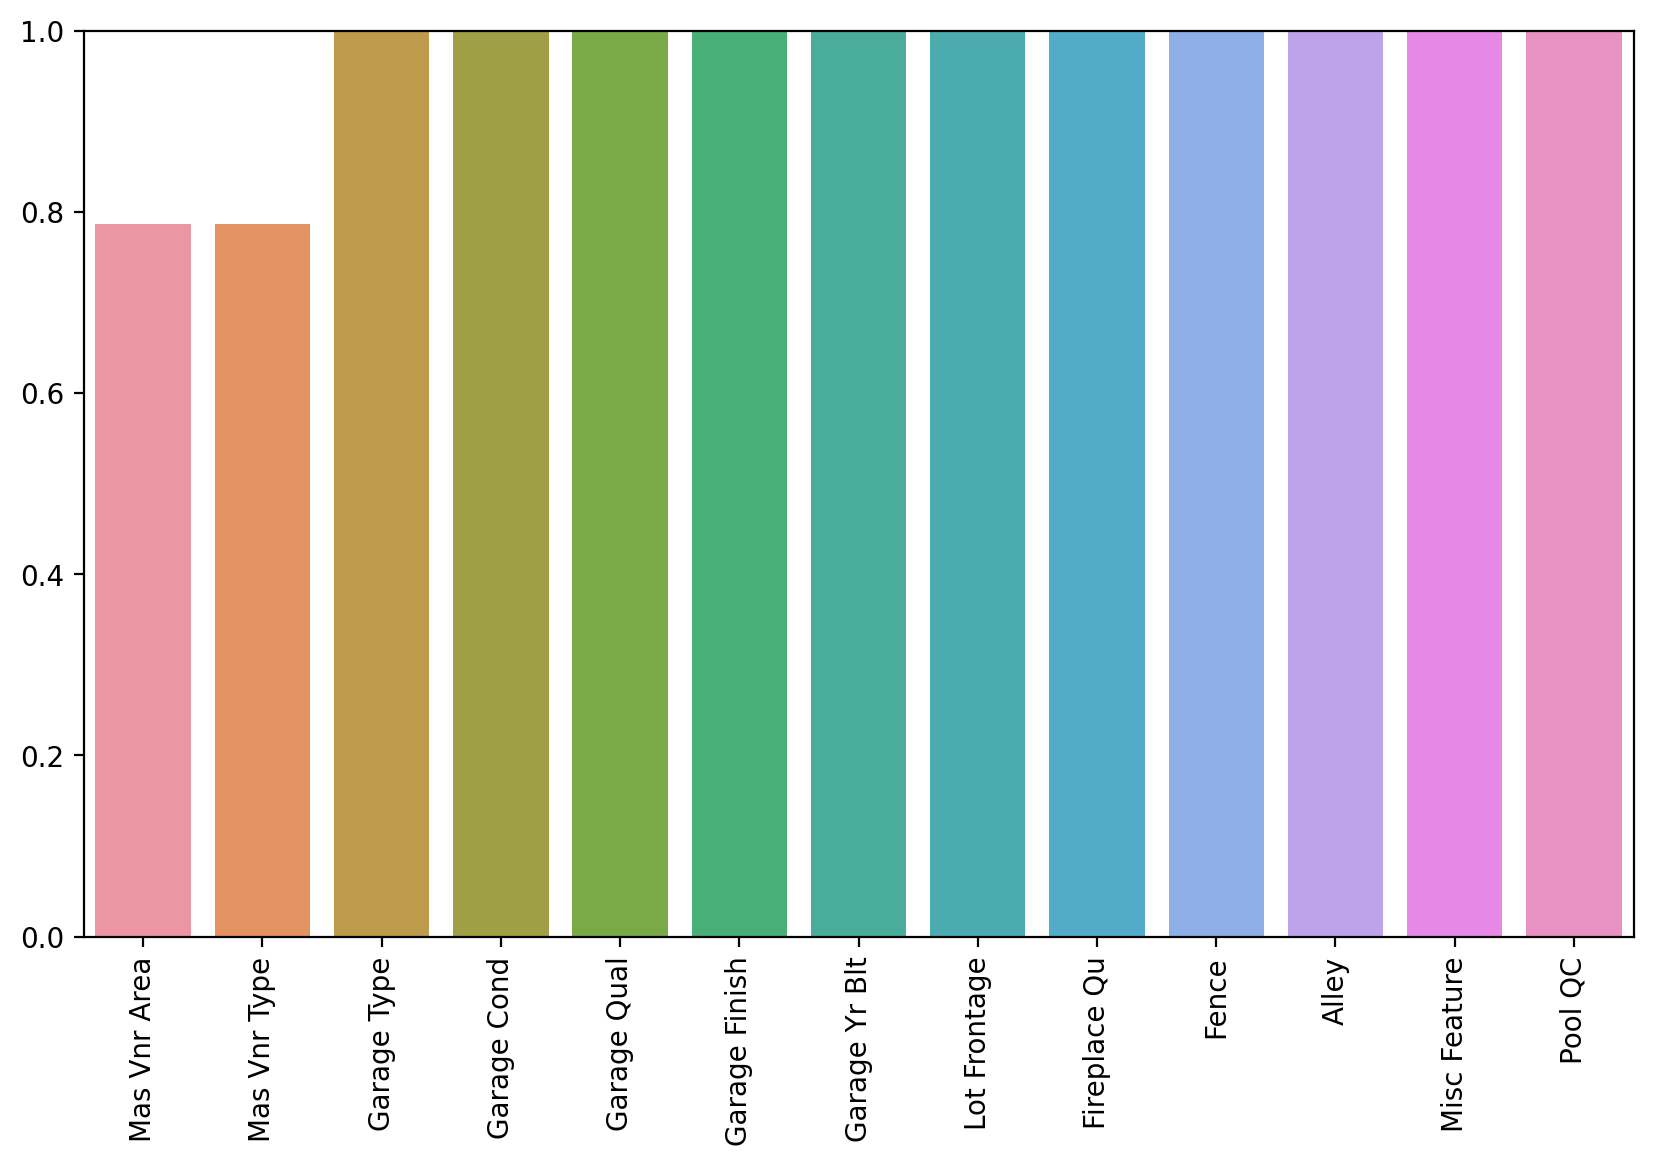

In [27]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(x=updated_percentage_missing.index, y=updated_percentage_missing)
plt.xticks(rotation=90)
plt.ylim(0, 1)

În acest moment ne-au mai rămas doar două features unde avem procentaj de valori lipsă mai mici de 1% (limită până la care am putea să folosim partea de fill sau drop pe rânduri, după care pentru un procent mai mare trebuie să schimbăm modalitatea de a face drop sau fill pentru coloane). Să verificăm aceste două features care au mai rămas

După o verificare în fișierul cu descrierea de features se poate observa faptul că există o categori deja de 'None' (ca și string) pentru feature-ul 'Mas Vnr Type'. Datele care lipsesc din acel feature le punem cu valoarea de 'None', iar cele din 'Mas Vnr Area' o să înlocuim cu valoarea 0

In [28]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Qual'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Yr Blt'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

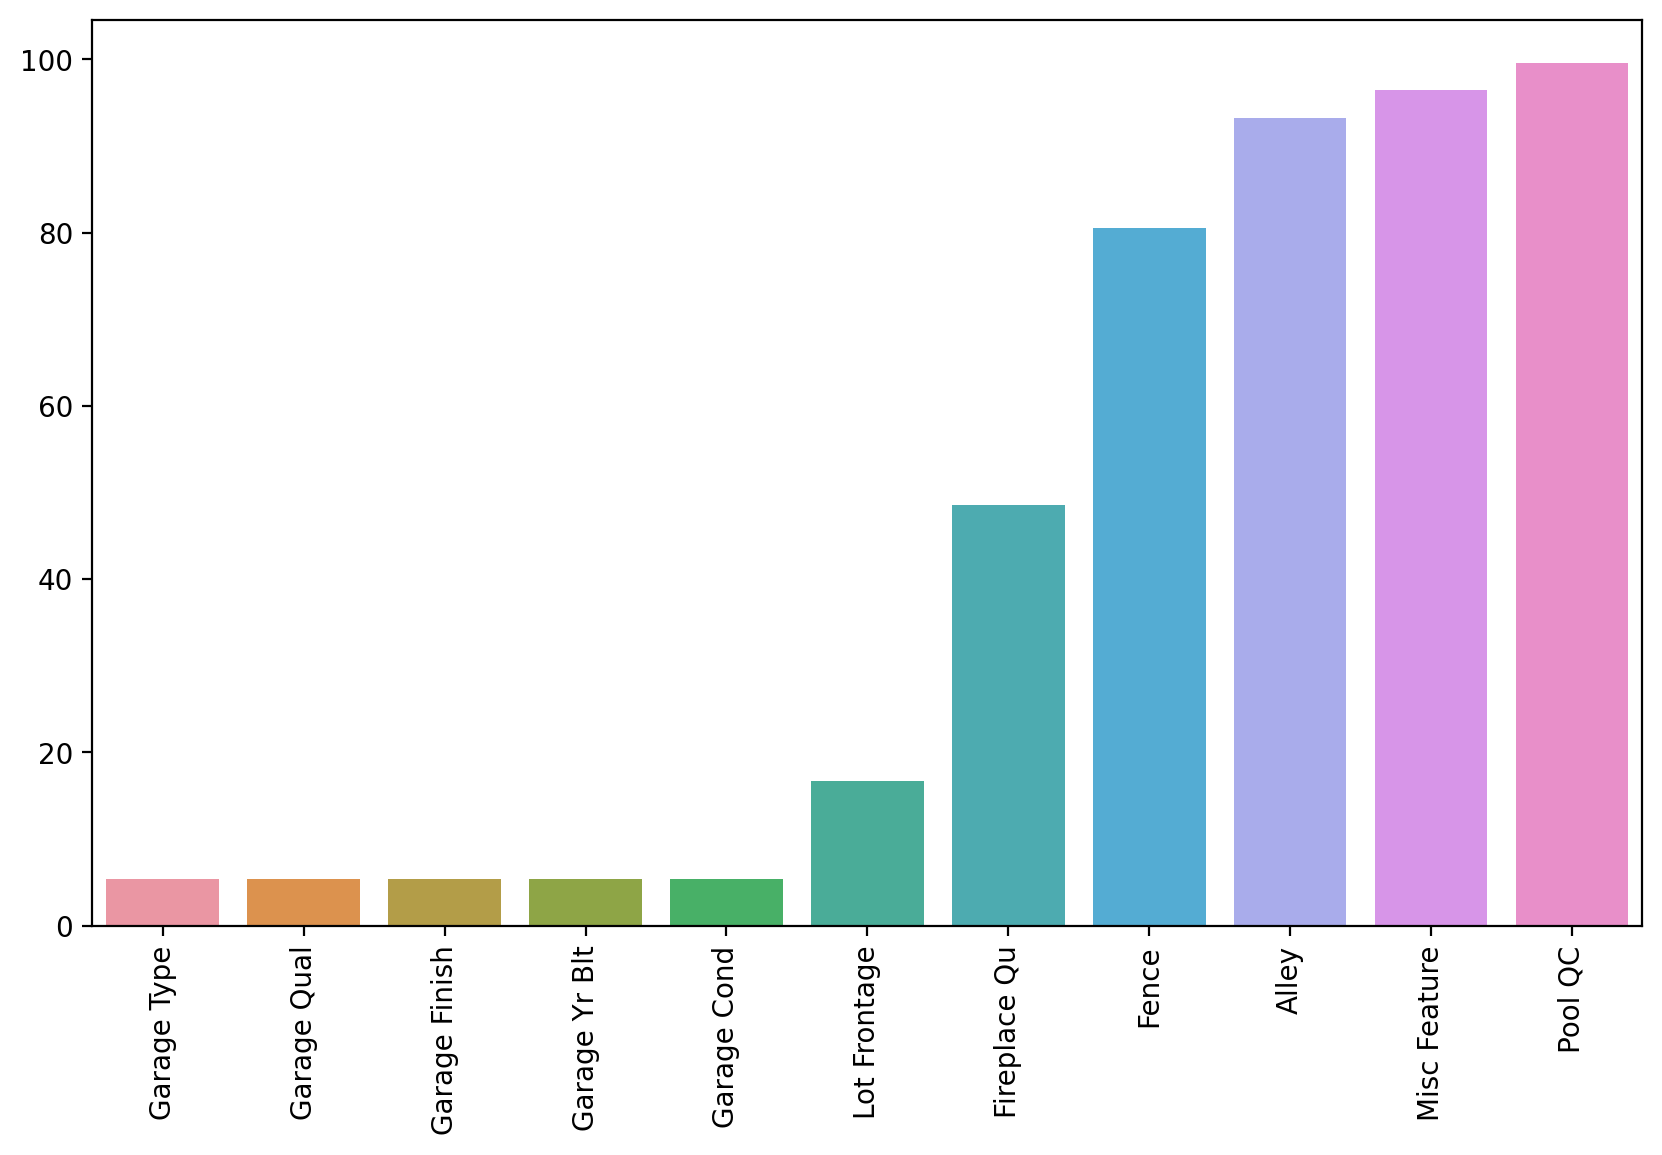

In [30]:
updated_percentage_missing = extract_missing_info(df)

plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(x=updated_percentage_missing.index, y=updated_percentage_missing)
plt.xticks(rotation=90)

Din acest moment am scăpat de features care aveau un procent mai mic de 1% cu date care lipsesc. La cele care au rămas trebuie să vedem ce anume facem cu datele lipsă, acesta valori ar trebui să le face drop sau fill pe bază de coloană. De exemplu, dacă hotărâm să facem drop la un anumit feature, atunci o să se șteargă toată coloana, chiar și datele unde nu sunt date lispă, de aceea trebuie să fim extrem de atenți la ce abordare alegem. Asta din nou, depinde de domain knowledge extrem de mult.

In [31]:
df.to_csv('../data/DATA/Ames_Housing_Data_filling_dropping_rows.csv')

## Recapitulare

În cadrul acestui tutorial am învățat următoarele lucruri:

    1. Este recomandat să facem drop pe rânduri doar la procentaje de valori mai mici de 1%

    2. Decizia de a face drop sau fill la datele null depinde de la caz la caz și de domain knowledge. De asemenea depinde și de tipul de date care este stocat în acel feature și ce anume reprezintă acele date. Aici este important să știm ce reprezintă fiecare feature

    3. Procentajele de peste 1% ar fi indicat să le abordăm cu ideea de fill or drop based on columns